In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import neattext.functions as nfx
import joblib  # For saving models

In [2]:
df = pd.read_excel("/home/fariz/Works/Malayalam-Emotion-Detector/github_test/Emotions data.xlsx")

In [3]:
df['Text'] = df['Text'].apply(nfx.remove_punctuations)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Emotion'], test_size=0.2, random_state=42)

In [5]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [6]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [7]:
y_pred = svm_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Abusive       0.23      0.25      0.24       189
       Anger       0.25      0.26      0.25       205
  Excitement       0.25      0.23      0.24       217
        Fear       0.34      0.31      0.32       211
       Happy       0.38      0.35      0.37       195
      Humour       0.19      0.17      0.18       192
        Love       0.34      0.47      0.40       174
         Sad       0.25      0.24      0.24       198
     Sarcasm       0.15      0.14      0.15       208
    Surprise       0.22      0.21      0.22       211

    accuracy                           0.26      2000
   macro avg       0.26      0.26      0.26      2000
weighted avg       0.26      0.26      0.26      2000



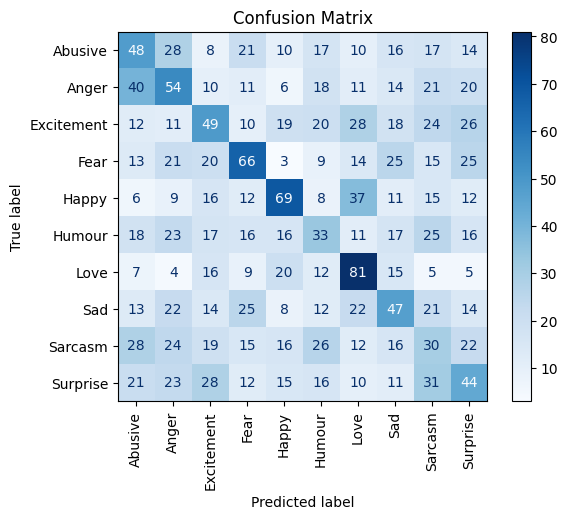

In [11]:
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
disp.ax_.set_title("Confusion Matrix")

# Show the plot
plt.show()

In [8]:
# Save the SVM model
joblib.dump(svm_model, "model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']